In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))


# PCA reduced almser

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from constants.visualization_defaults import FIG_SIZE, FONT_SIZE_PARAMS

plt.rcParams.update(FONT_SIZE_PARAMS) 

figsize = FIG_SIZE

In [4]:
def get_reduced_data(file):
    data = pd.read_csv(file)

    X = data.drop(["label"], axis=1)
    y = data["label"]

    match_indices = data[data["label"] == 1].index
    non_match_indices = data[data["label"] == 0].index

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(scaled_data)

    match_pca = X_pca[match_indices]
    non_match_pca = X_pca[non_match_indices]

    return X_pca, y, non_match_pca,  match_pca

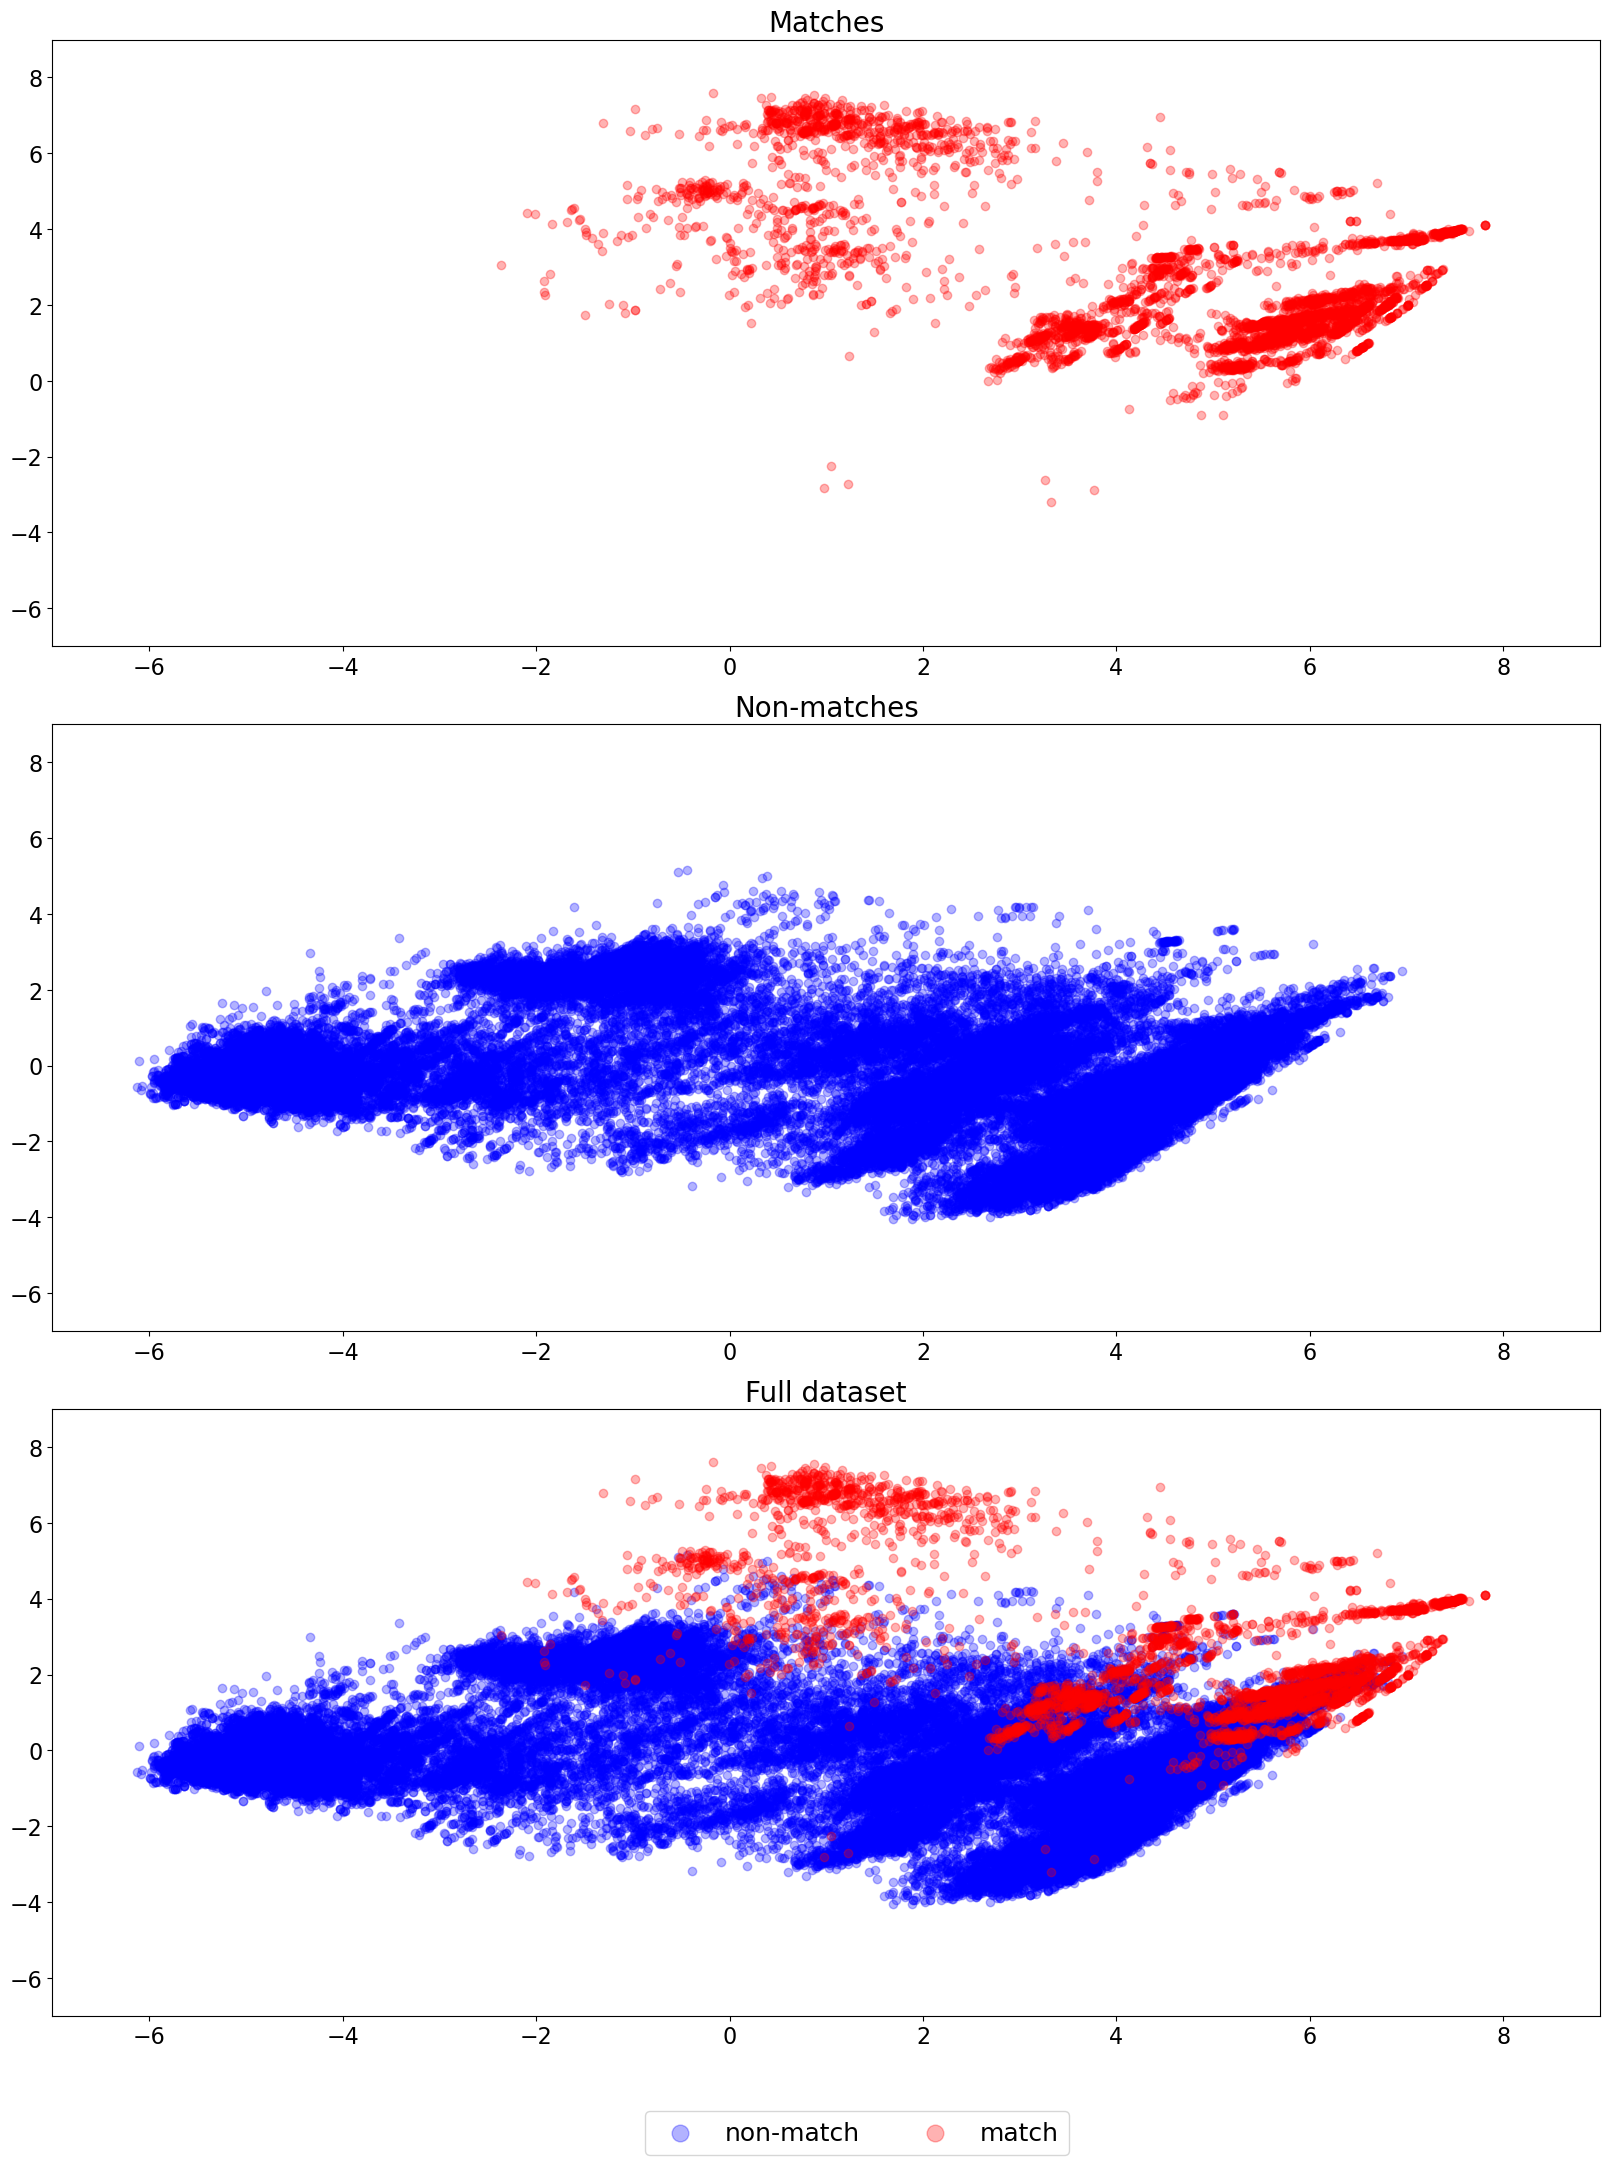

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(18, 24))

file = ("../../datasets/wdc_almser/preprocessed_wdc_almser_most_values.csv")

X_pca, y, non_match_pca, match_pca = get_reduced_data(file)



axs[0].scatter(match_pca[:, 0], match_pca[:, 1], color='red', alpha=0.3, label='match')
axs[0].set_xlim(-7, 9)
axs[0].set_ylim(-7, 9)
axs[0].set_title("Matches")


axs[1].scatter(non_match_pca[:, 0], non_match_pca[:, 1], color='blue', alpha=0.3, label='non-match')
axs[1].set_xlim(-7, 9)
axs[1].set_ylim(-7, 9)
axs[1].set_title("Non-matches")

axs[2].scatter(non_match_pca[:, 0], non_match_pca[:, 1], color='blue', alpha=0.3, label='non-match')
axs[2].scatter(match_pca[:, 0], match_pca[:, 1], color='red', alpha=0.3, label='match')
axs[2].set_xlim(-7, 9)
axs[2].set_ylim(-7, 9)
axs[2].set_title("Full dataset")



plt.legend(loc='lower center', bbox_to_anchor=(0.52, -0.25),
           ncol=2, markerscale=2,   )

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95]) 
plt.show()


# Mislabeled instances wdc-almser

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from util.detectors.fkdn_detector import FKDN_Detector

In [15]:
figsize = (20, 20) 
plt.rcParams.update(
 {
    'axes.titlesize': 24,   
    'axes.labelsize': 22,   
    'xtick.labelsize': 16,  
    'ytick.labelsize': 16,  
    'legend.fontsize': 22   
}) 

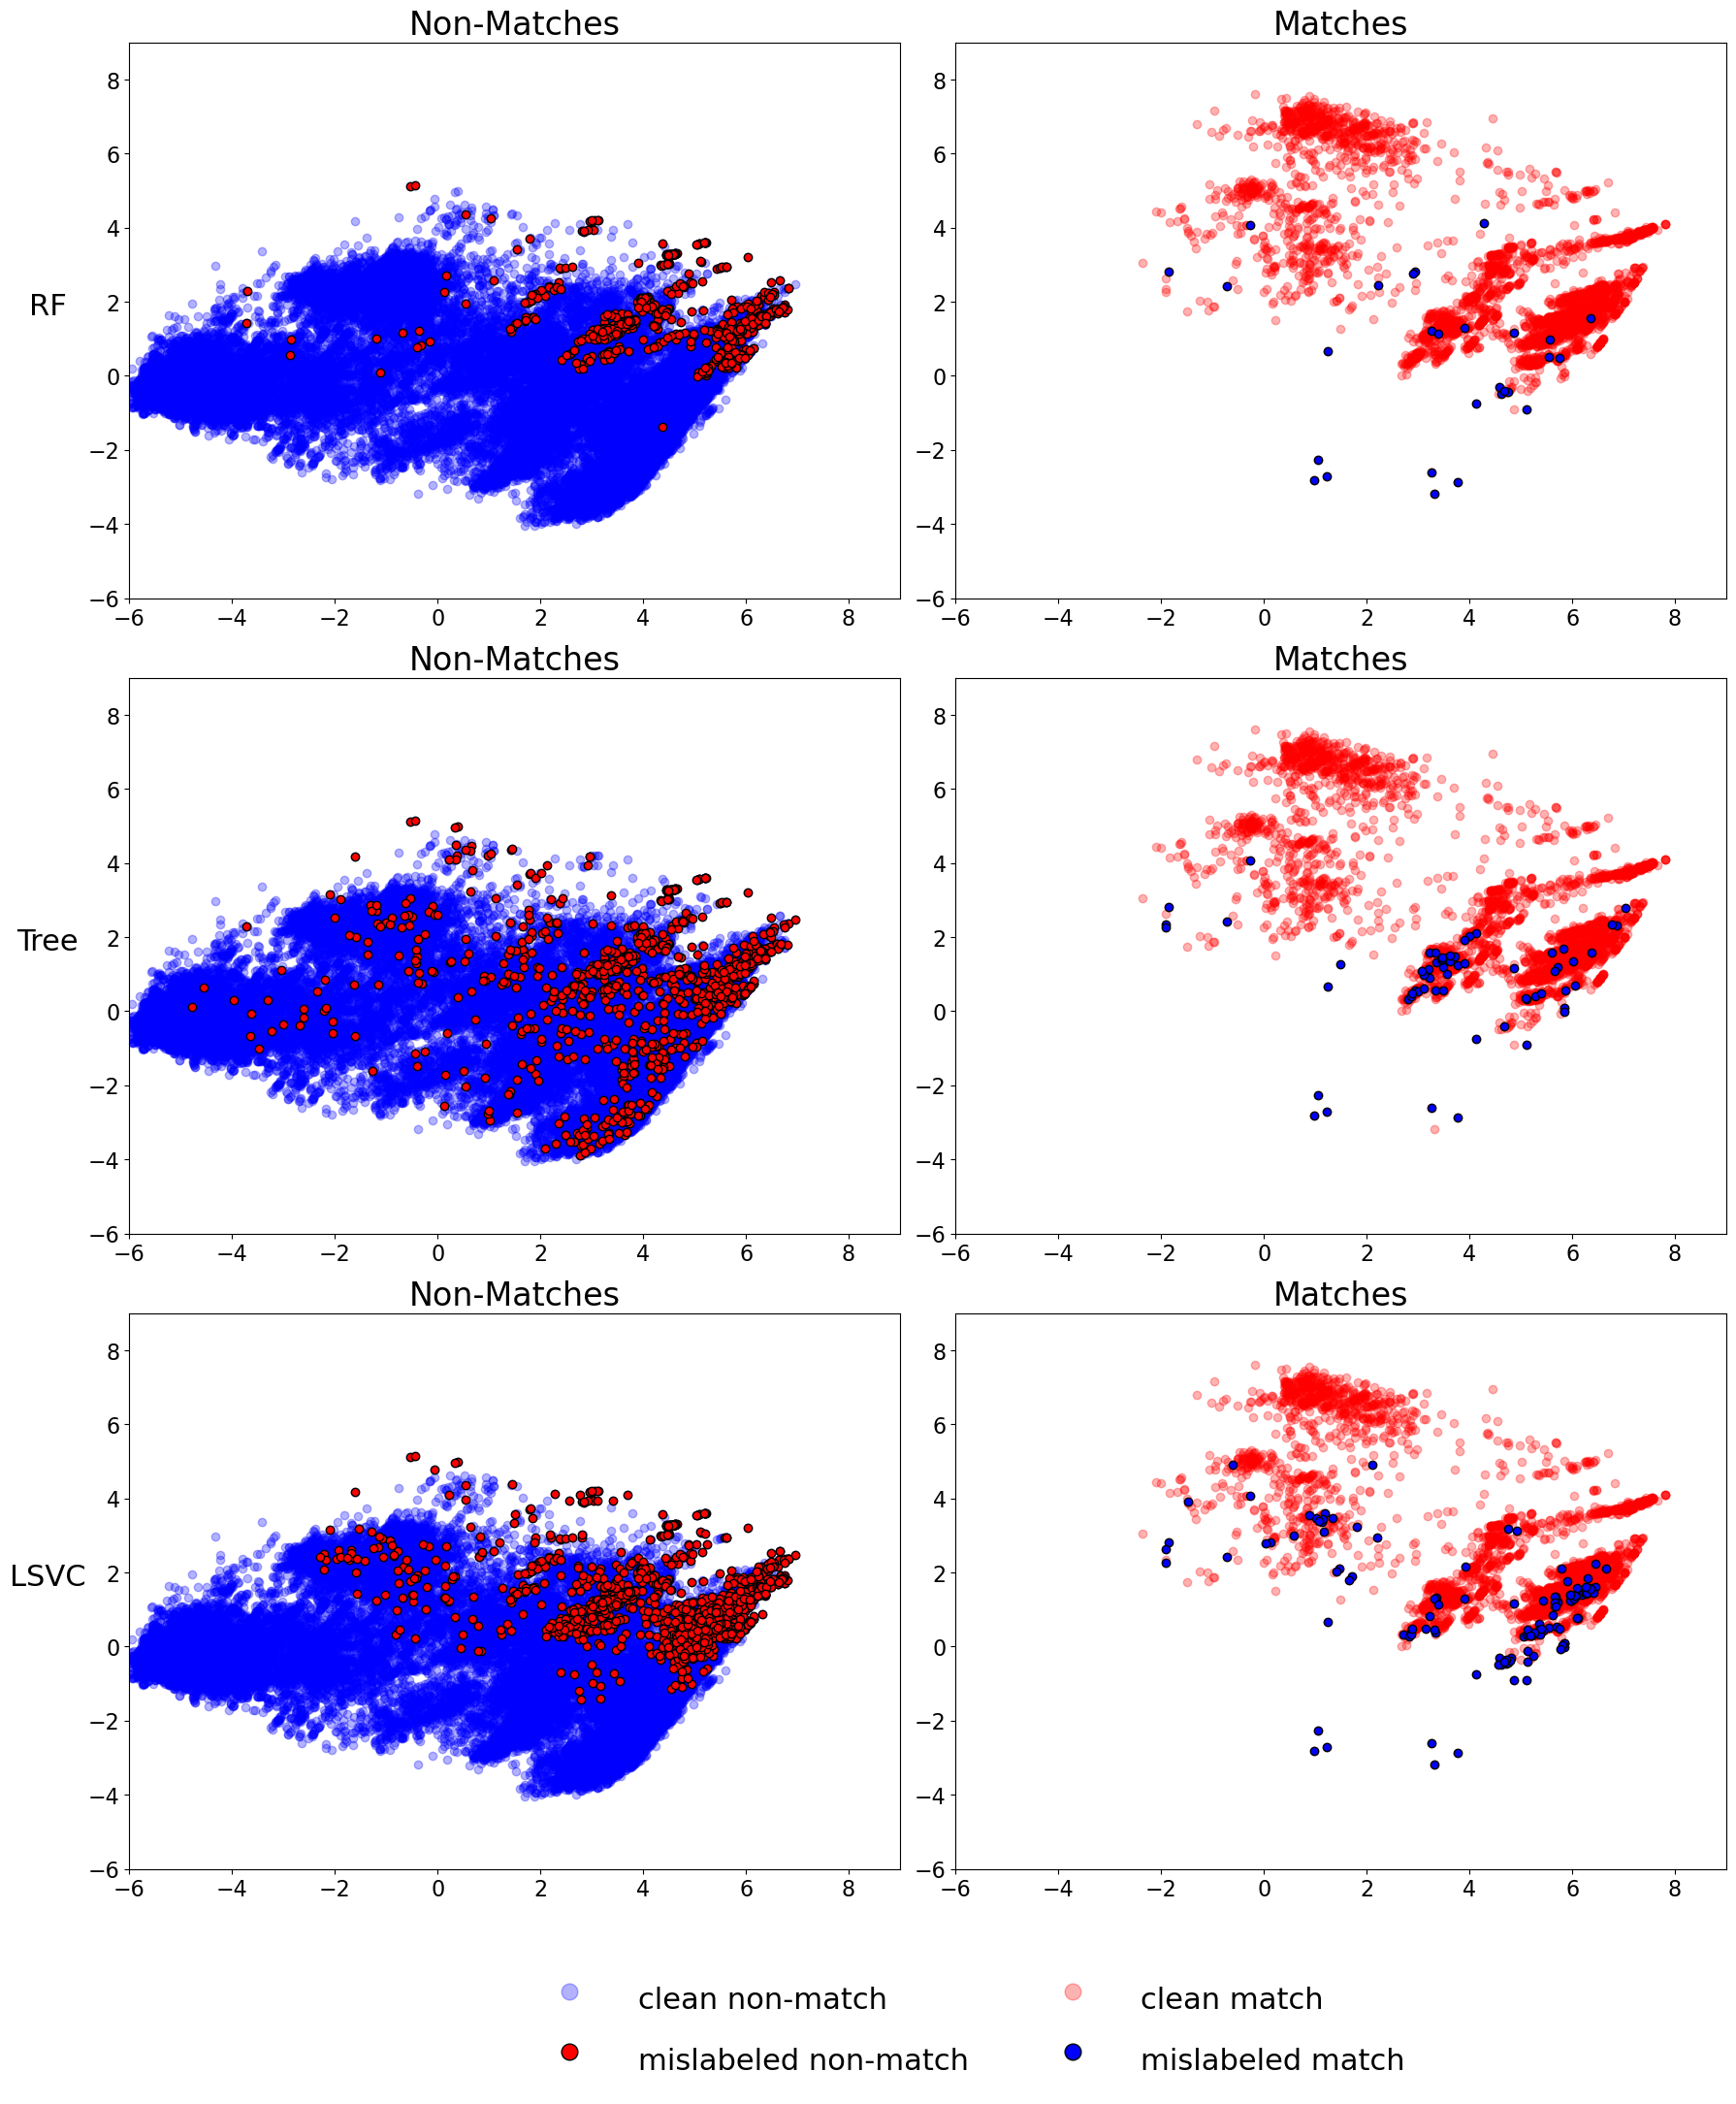

In [ ]:
def get_reduced_data(file):
    data = pd.read_csv(file)

    X = data.drop(["label", "noisy_label"], axis=1)
    y = data["label"]

    match_indices = data[data["label"] == 1].index
    non_match_indices = data[data["label"] == 0].index

    mislabeled_indices = data[data["label"] != data["noisy_label"]].index
    mislabeled_match_indices = data[(data["label"] == 1) & (data["noisy_label"] == 0)].index
    mislabeled_non_match_indices = data[(data["label"] == 0) & (data["noisy_label"] == 1)].index

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(scaled_data)

    mislabeled_pca = X_pca[mislabeled_indices]
    match_pca = X_pca[match_indices]
    non_match_pca = X_pca[non_match_indices]
    mislabeled_match_pca = X_pca[mislabeled_match_indices]
    mislabeled_non_match_pca = X_pca[mislabeled_non_match_indices]

    colors = data.iloc[mislabeled_indices].apply(lambda row: 'blue' if row["noisy_label"] == 0 else 'red', axis=1)

    return X_pca, y, non_match_pca, mislabeled_non_match_pca, match_pca, mislabeled_match_pca, mislabeled_pca, colors


fig, axs = plt.subplots(3, 2, figsize=figsize)

files = [
 ("../../datasets/wdc_almser/wdc_almser_most_values_rf_corrupted.csv"),
 ("../../datasets/wdc_almser/wdc_almser_most_values_tree_corrupted.csv"),
 ("../../datasets/wdc_almser/wdc_almser_most_values_svm_corrupted.csv")
]


for row_index, file in enumerate(files):

    X_pca, y, non_match_pca, mislabeled_non_match_pca, match_pca, mislabeled_match_pca, mislabeled_pca, colors = get_reduced_data(file)

    axs[row_index][0].set_title('Non-Matches')
    axs[row_index][0].scatter(non_match_pca[:, 0], non_match_pca[:, 1],  color='blue', alpha=0.3, label='clean non-match')
    axs[row_index][0].scatter(mislabeled_non_match_pca[:, 0], mislabeled_non_match_pca[:, 1], color='red', edgecolors='black', alpha=1, label='mislabeled non-match')
    axs[row_index][0].set_xlim(-6, 9)
    axs[row_index][0].set_ylim(-6, 9)

    axs[row_index][1].set_title('Matches')
    axs[row_index][1].scatter(match_pca[:, 0], match_pca[:, 1],  color='red', alpha=0.3, label='clean match')
    axs[row_index][1].scatter(mislabeled_match_pca[:, 0], mislabeled_match_pca[:, 1], color='blue', edgecolors='black', alpha=1, label='mislabeled match')
    axs[row_index][1].set_xlim(-6, 9)
    axs[row_index][1].set_ylim(-6, 9)



row_titles = ['RF', 'Tree', 'LSVC']
for i, title in enumerate(row_titles):
    axs[i, 0].set_ylabel(title, labelpad=30, rotation=0, loc='center')

handles = []
all_labels = []

axs = axs.flatten()

for i, ax in enumerate(axs):
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    all_labels.extend(l)
    if i == 1:
        break

fig.legend(handles, all_labels, loc='lower center',
           bbox_to_anchor=(0.6, -0.1),  
           ncol=2, frameon=False, markerscale=2, 
           handlelength=3, 
           handleheight=2)

plt.tight_layout(rect=[0.1, 0, 1, 0.99])  
plt.show()
